In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [57]:
# Carica i dati
data = pd.read_csv('Dataset.csv')
data.info()

# Calcola le statistiche descrittive
desc_stats = data.describe()

# Visualizza le statistiche descrittive
print(desc_stats)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   


In [58]:
# Filtra i dati per gli anni '70 e '82
filtered_data = data[(data['model_year'] >= 70) & (data['model_year'] <= 82)]

# Modelli più prodotti negli Stati Uniti
us_models = filtered_data[filtered_data['origin'] == 'usa']['name'].value_counts().head(5)

# Modelli più prodotti in Europa
europe_models = filtered_data[filtered_data['origin'] == 'europe']['name'].value_counts().head(5)

# Modelli più prodotti in Giappone
japan_models = filtered_data[filtered_data['origin'] == 'japan']['name'].value_counts().head(5)


<Figure size 1500x600 with 0 Axes>

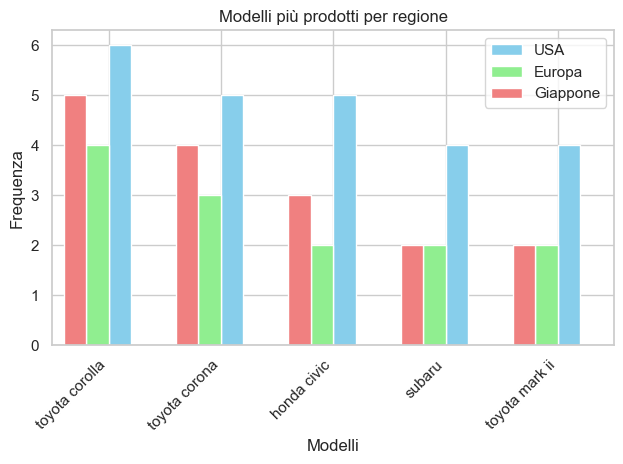

In [82]:
# Crea grafici a barre con colori distinti per ciascuna regione
plt.figure(figsize=(15, 6))  # Aumenta la dimensione del grafico
fig, ax = plt.subplots()
us_models.plot(kind='bar', color='skyblue', ax=ax, position=0, width=0.2)
europe_models.plot(kind='bar', color='lightgreen', ax=ax, position=1, width=0.2)
japan_models.plot(kind='bar', color='lightcoral', ax=ax, position=2, width=0.2)

#Aggiungo etichette 
plt.xlabel('Modelli')
plt.ylabel('Frequenza')
plt.title('Modelli più prodotti per regione')
plt.legend(['USA', 'Europa', 'Giappone'])
plt.xticks(rotation=45, ha="right")  # Ruota le etichette dell'asse x e posiziona a destra
plt.xlim(left=-0.5, right=4.5)  # Aggiungo spazio a sinistra e a destra
plt.tight_layout()  # Aggiunge spazi per migliorare la visualizzazione
plt.show()


In [60]:
# Calcolo della potenza media per ciascun'origine
mean_horsepower_by_origin = data.groupby('origin')['horsepower'].mean().reset_index()


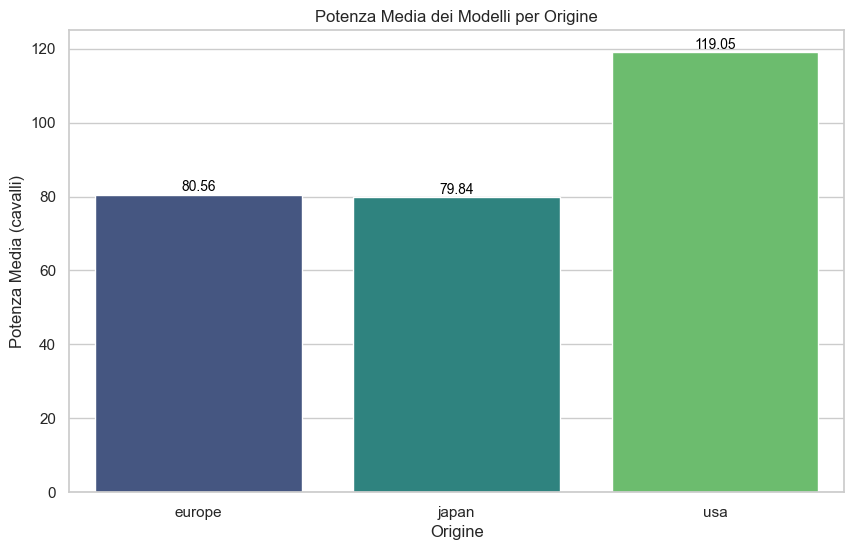

In [61]:
# Creazione del grafico utilizzando Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=mean_horsepower_by_origin, x='origin', y='horsepower', palette='viridis')
plt.title('Potenza Media dei Modelli per Origine')
plt.xlabel('Origine')
plt.ylabel('Potenza Media (cavalli)')

# Aggiunta delle etichette per ciascuna barra
for index, value in enumerate(mean_horsepower_by_origin['horsepower']):
    bar_plot.text(index, value + 1, str(round(value, 2)), ha='center', color='black', fontsize=10)

plt.show()


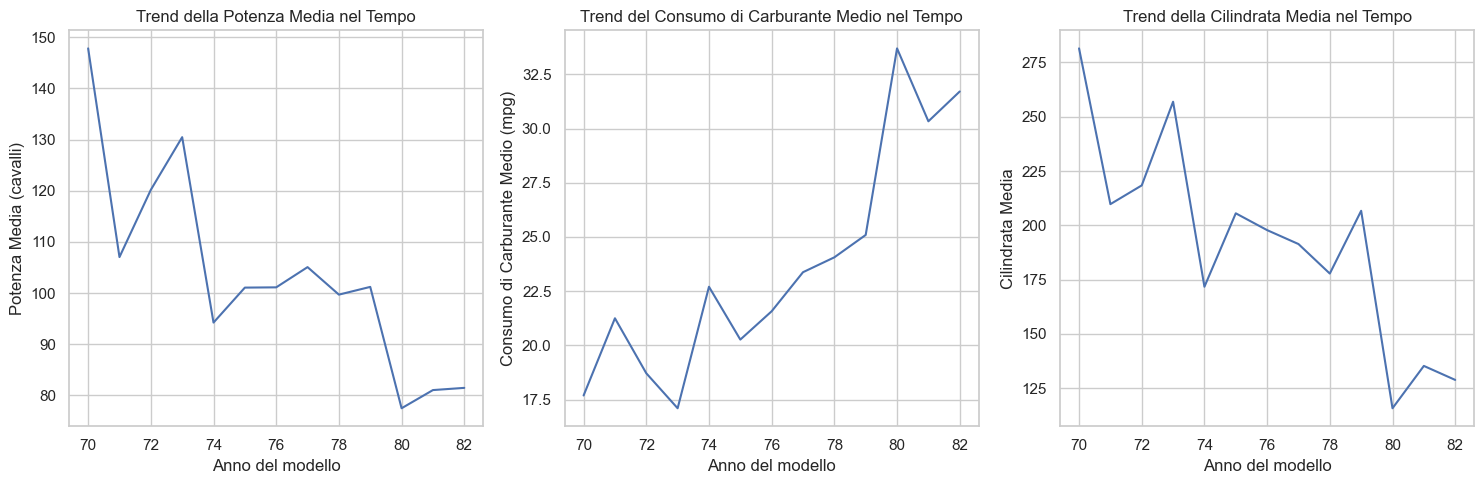

In [62]:
# Creazione dei grafici per i trend relativi alla potenza, al consumo di carburante e alla cilindrata nel corso degli anni
plt.figure(figsize=(15, 5))


# Trend della potenza nel corso degli anni
plt.subplot(1, 3, 1)
power_trend = data.groupby('model_year')['horsepower'].mean()
sns.lineplot(x=power_trend.index, y=power_trend.values)
plt.title('Trend della Potenza Media nel Tempo')
plt.xlabel('Anno del modello')
plt.ylabel('Potenza Media (cavalli)')

# Trend del consumo di carburante nel corso degli anni
plt.subplot(1, 3, 2)
mpg_trend = data.groupby('model_year')['mpg'].mean()
sns.lineplot(x=mpg_trend.index, y=mpg_trend.values)
plt.title('Trend del Consumo di Carburante Medio nel Tempo')
plt.xlabel('Anno del modello')
plt.ylabel('Consumo di Carburante Medio (mpg)')

# Trend della cilindrata nel corso degli anni
plt.subplot(1, 3, 3)
displacement_trend = data.groupby('model_year')['displacement'].mean()
sns.lineplot(x=displacement_trend.index, y=displacement_trend.values)
plt.title('Trend della Cilindrata Media nel Tempo')
plt.xlabel('Anno del modello')
plt.ylabel('Cilindrata Media')

plt.tight_layout()
plt.show()

In [63]:
# Trova i modelli più prodotti al mondo
top_models_worldwide = data['name'].value_counts().head(5).index

# Filtra il dataset solo per i modelli più prodotti al mondo
data_top_models = data[data['name'].isin(top_models_worldwide)]


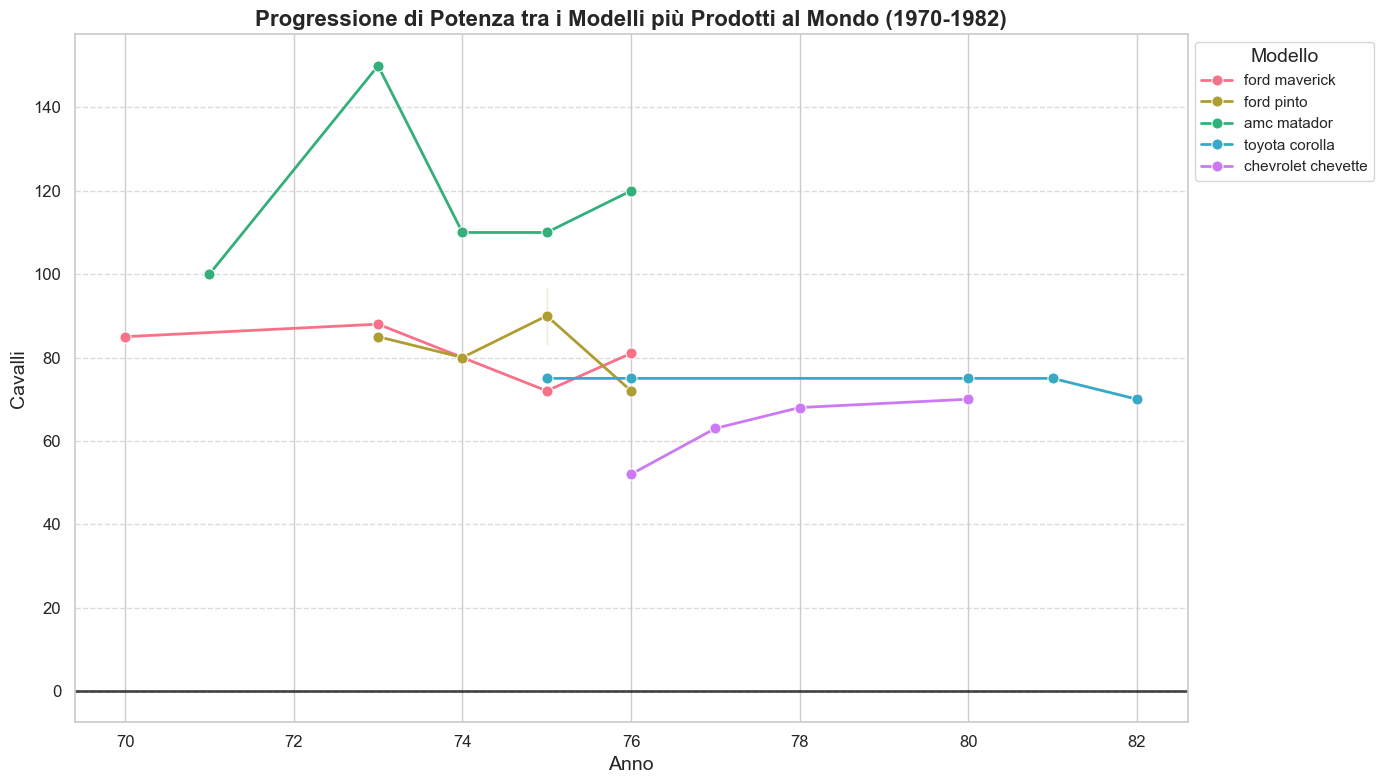

In [64]:
# Crea un grafico lineare con Seaborn
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.lineplot(x='model_year', y='horsepower', hue='name', data=data_top_models, palette='husl', marker='o', markersize=8, linewidth=2)

plt.title('Progressione di Potenza tra i Modelli più Prodotti al Mondo (1970-1982)', fontsize=16, weight='bold')
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Cavalli', fontsize=14)
plt.legend(title='Modello', loc='upper left', bbox_to_anchor=(1, 1), title_fontsize='14')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Aggiungi una linea per separare il titolo dal grafico
plt.axhline(0, color='black', linewidth=2, alpha=0.7)

plt.show()